In [109]:
# twelvedata API for more info https://github.com/twelvedata/twelvedata-python
from twelvedata import TDClient
td = TDClient(apikey="c7735dfefbfe4378848d2a516016b65e")

In [110]:
# Construct the necessary time series
ts = td.time_series(
    symbol="EUR/USD",
    interval="1h",
    outputsize=5000,
    timezone="Europe/Berlin",
)

In [111]:
json_sample = ts.as_json()

In [112]:
json_sample

({'datetime': '2023-05-05 22:00:00',
  'open': '1.10180',
  'high': '1.10200',
  'low': '1.10170',
  'close': '1.10180'},
 {'datetime': '2023-05-05 21:00:00',
  'open': '1.10250',
  'high': '1.10270',
  'low': '1.10165',
  'close': '1.10180'},
 {'datetime': '2023-05-05 20:00:00',
  'open': '1.10120',
  'high': '1.10270',
  'low': '1.10110',
  'close': '1.10270'},
 {'datetime': '2023-05-05 19:00:00',
  'open': '1.10325',
  'high': '1.10350',
  'low': '1.10100',
  'close': '1.10120'},
 {'datetime': '2023-05-05 18:00:00',
  'open': '1.10250',
  'high': '1.10370',
  'low': '1.10210',
  'close': '1.10325'},
 {'datetime': '2023-05-05 17:00:00',
  'open': '1.10070',
  'high': '1.10270',
  'low': '1.10050',
  'close': '1.10240'},
 {'datetime': '2023-05-05 16:00:00',
  'open': '1.09910',
  'high': '1.10080',
  'low': '1.09850',
  'close': '1.10075'},
 {'datetime': '2023-05-05 15:00:00',
  'open': '1.09765',
  'high': '1.09960',
  'low': '1.09750',
  'close': '1.09920'},
 {'datetime': '2023-05-0

In [113]:
import numpy as np

result = list(map(lambda x: float(x['close']), json_sample))
result = np.array(result)
result

array([1.1018, 1.1018, 1.1027, ..., 1.0193, 1.0155, 1.0137])

In [114]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt


In [115]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [116]:

wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[-0.7232834   0.00403631]]  wh =  [[-0.83990896  0.5427273 ]
 [-0.5427273  -0.83990896]]  bh =  [0. 0.]  wy = [[-1.228528 ]
 [-0.8191368]] by =  [0.]


In [117]:
demo_model.get_weights()

x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)
 
 
m = 2
h0 = np.zeros(m)

h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by
 
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)
 
print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

1/1 [==============================] - 0s 103ms/step
h1 =  [[-0.72328341  0.00403631]] h2 =  [[-0.84126522 -0.38786316]] h3 =  [[-1.25276011 -0.11869893]]
Prediction from network  [[1.6362816]]
Prediction from our computation  [[1.63628156]]


In [118]:
exxy = np.array([4,5,6]).reshape(1,3,1)
exxy

array([[[4],
        [5],
        [6]]])

In [119]:
demo_model.predict(exxy)

1/1 [==============================] - 0s 15ms/step


array([[2.4914339]], dtype=float32)

In [120]:
exxy2 = np.array([1,2,3,4,5,6]).reshape(2,3,1)
exxy2

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [121]:
demo_model.predict(exxy2)

1/1 [==============================] - 0s 15ms/step


array([[1.6362816],
       [2.4914339]], dtype=float32)

In [122]:

x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)

1/1 [==============================] - 0s 15ms/step


In [123]:
print(y_pred_model)
print(x_input)

def scale(data):
    #a = np.array([1,2,3,4,5]).reshape(5, 1)
    print(data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data) #.flatten()
    print(data)
#scale(x_input.reshape(3,1))
print(x.reshape(-1,1))

[[1.6362816]]
[[[1]
  [2]
  [3]]]
[[1]
 [2]
 [3]]


In [124]:

# Parameter split_percent defines the ratio of training examples
def get_train_test(data, split_percent=0.8):
    data = data.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
train_data, test_data, data = get_train_test(result)
data

array([0.95670436, 0.95670436, 0.96252019, ..., 0.42358643, 0.39903069,
       0.38739903])

In [125]:
# def split(xs, time_steps=50, test_ratio=0.7):
#    result = []
#    for index in range(len(xs) - time_steps):
#        result.append(xs[index : index + time_steps])
#    
#    test_count = int(len(result) * test_ratio)
#    return (result[:test_count], result[test_count:])


In [126]:
data

array([0.95670436, 0.95670436, 0.96252019, ..., 0.42358643, 0.39903069,
       0.38739903])

In [127]:

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    #Y_ind = np.arange(time_steps, len(dat), time_steps)
    #Y = dat[Y_ind]
    # Prepare X
    #rows_x = len(Y)
    #X = dat[range(time_steps*rows_x)]
    #X = np.reshape(X, (rows_x, time_steps, 1))    
    
    Y_ind = np.arange(time_steps, len(dat), 1)
    Y = dat[Y_ind]
    
    # Prepare X
    rows_x = len(Y)
    X = []
    for i in range(rows_x):
        X.append(dat[range(i,(time_steps+i))])
    X = np.array(X)
    np.reshape(X, (rows_x, time_steps, 1))
    return X, Y
 

In [128]:
train_data

array([0.95670436, 0.95670436, 0.96252019, ..., 0.27754443, 0.28723748,
       0.29563813])

In [129]:
trainX, trainY = get_XY(train_data, time_steps)


In [130]:
trainX

array([[0.95670436, 0.95670436, 0.96252019, ..., 0.95088853, 0.96058158,
        0.9631664 ],
       [0.95670436, 0.96252019, 0.95282714, ..., 0.96058158, 0.9631664 ,
        0.9631664 ],
       [0.96252019, 0.95282714, 0.96607431, ..., 0.9631664 , 0.9631664 ,
        0.9631664 ],
       ...,
       [0.28594507, 0.2904685 , 0.29660743, ..., 0.30662359, 0.29305331,
        0.2911147 ],
       [0.2904685 , 0.29660743, 0.29434572, ..., 0.29305331, 0.2911147 ,
        0.27754443],
       [0.29660743, 0.29434572, 0.29757674, ..., 0.2911147 , 0.27754443,
        0.28723748]])

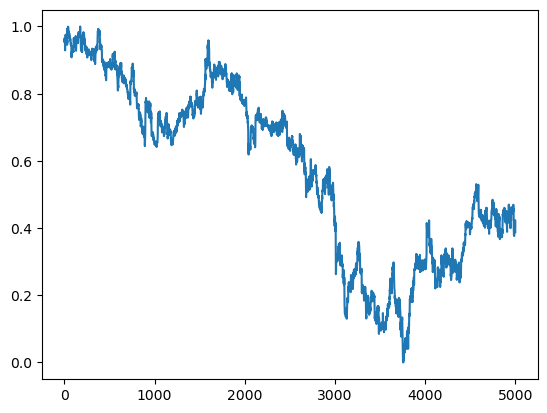

In [131]:
plt.plot(data)
#plt.plot(result)

In [132]:
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [133]:
trainX.shape

(3988, 12)

In [134]:

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
3988/3988 - 5s - loss: 0.0274 - 5s/epoch - 1ms/step
Epoch 2/20
3988/3988 - 5s - loss: 0.0018 - 5s/epoch - 1ms/step
Epoch 3/20
3988/3988 - 5s - loss: 0.0014 - 5s/epoch - 1ms/step
Epoch 4/20
3988/3988 - 5s - loss: 0.0010 - 5s/epoch - 1ms/step
Epoch 5/20
3988/3988 - 5s - loss: 8.3253e-04 - 5s/epoch - 1ms/step
Epoch 6/20
3988/3988 - 5s - loss: 7.4034e-04 - 5s/epoch - 1ms/step
Epoch 7/20
3988/3988 - 5s - loss: 6.7532e-04 - 5s/epoch - 1ms/step
Epoch 8/20
3988/3988 - 5s - loss: 6.4001e-04 - 5s/epoch - 1ms/step
Epoch 9/20
3988/3988 - 5s - loss: 6.1937e-04 - 5s/epoch - 1ms/step
Epoch 10/20
3988/3988 - 5s - loss: 6.0191e-04 - 5s/epoch - 1ms/step
Epoch 11/20
3988/3988 - 5s - loss: 6.0297e-04 - 5s/epoch - 1ms/step
Epoch 12/20
3988/3988 - 5s - loss: 5.7035e-04 - 5s/epoch - 1ms/step
Epoch 13/20
3988/3988 - 5s - loss: 5.6711e-04 - 5s/epoch - 1ms/step
Epoch 14/20
3988/3988 - 5s - loss: 5.4623e-04 - 5s/epoch - 1ms/step
Epoch 15/20
3988/3988 - 5s - loss: 5.3388e-04 - 5s/epoch - 1ms/step
Epoch

In [135]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

31/31 [==============================] - 0s 902us/step
Train RMSE: 0.025 RMSE
Test RMSE: 0.029 RMSE


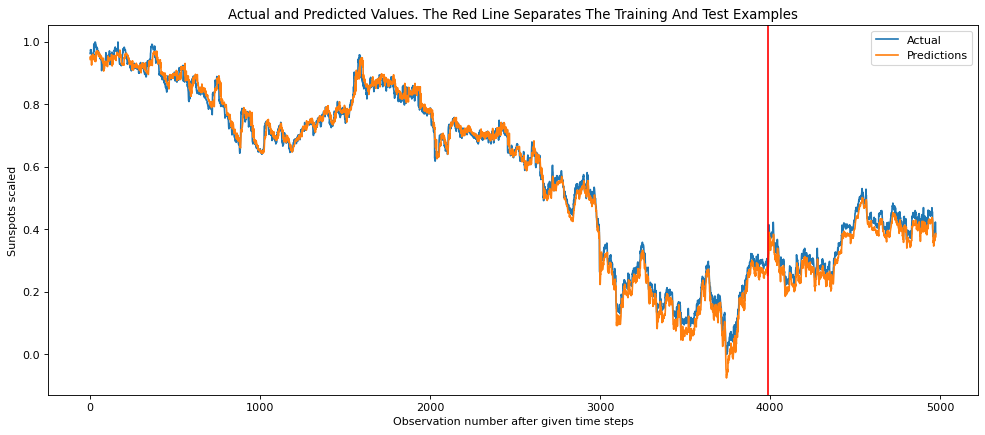

In [136]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

In [152]:

def generate_predictions(initial_data, length):
    x = initial_x.copy()
    predictions = []
    for i in range(length):
        next_pred = model.predict(np.array([x]))[0][0]
        predictions.append(next_pred)
        x = np.append(x[1:], next_pred)
    return np.array(predictions)

In [156]:
def plot_predictions(actual_data, predictions):
    plt.figure(figsize=(15, 6), dpi=80)
    #  plt.plot(range(rows), x)
    #plt.plot( initial_x, marker=11)
    plt.plot(actual_data, marker=11)
    plt.plot(predictions)
    plt.legend(['Actual', 'Predictions'])


1/1 [==============================] - 0s 14ms/step


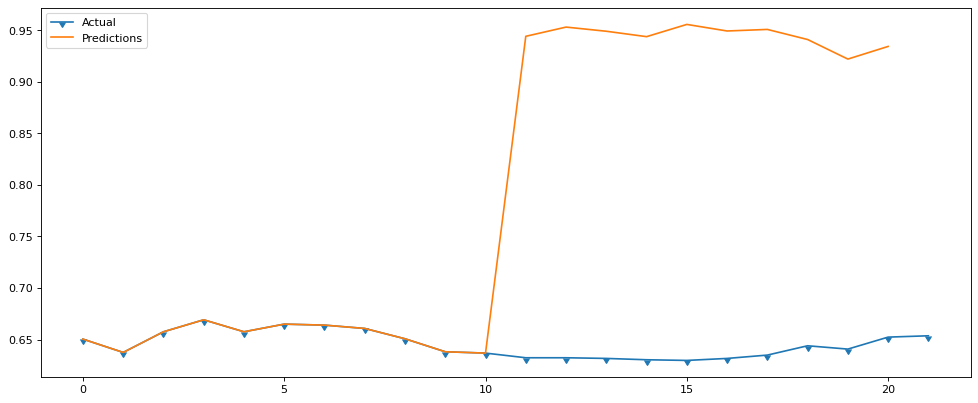

In [164]:
def show_predictions(start_index, length, data, training_length):
    initial_data = data[(start_index-training_length):(start_index-1)]
    actual_data = data[(start_index-training_length):(start_index + length)]
    predictions =  generate_predictions(initial_data, length)
    plot_predictions(actual_data, np.append(initial_data, predictions))
show_predictions(2500, 10, train_data, time_steps)

1/1 [==============================] - 0s 15ms/step


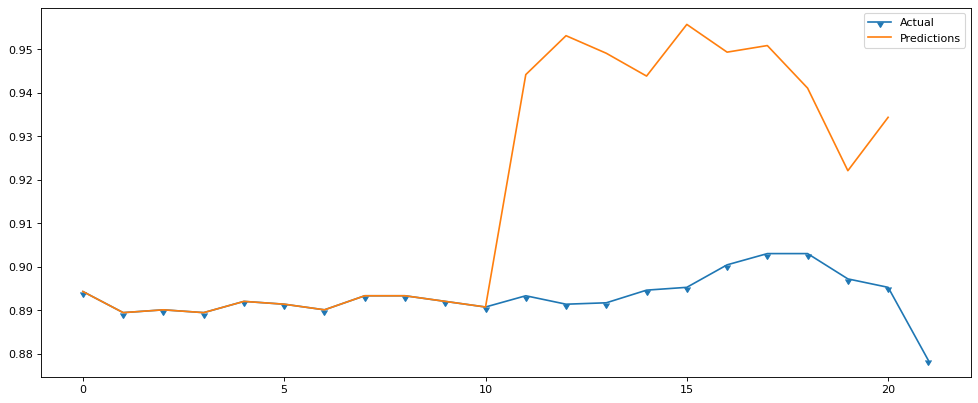

In [163]:
show_predictions(502, 10, train_data, time_steps)

1/1 [==============================] - 0s 14ms/step


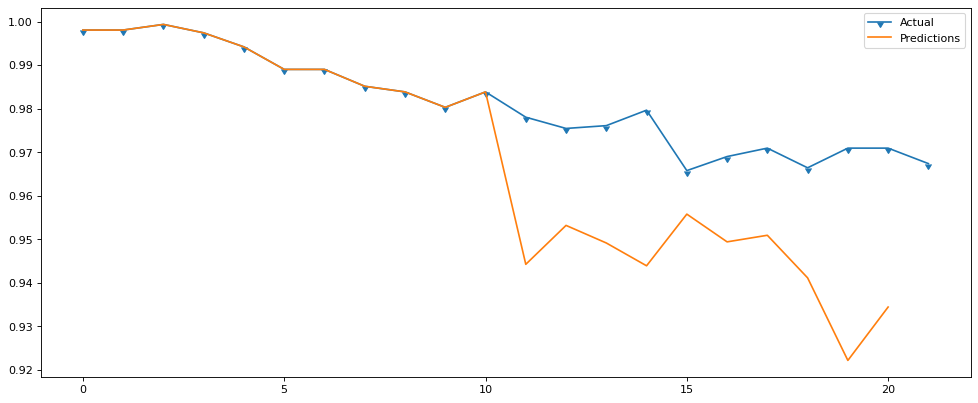

In [161]:
show_predictions(52, 10, train_data, time_steps)

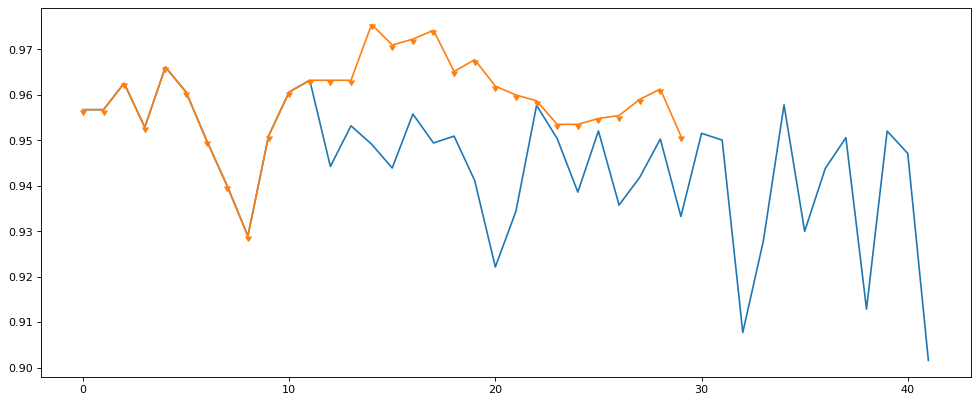

In [145]:
# Plot the result
def plot_result_(initial_x, predictions, x):
    predictions = np.append(initial_x, predictions)
    #rows = len(x)
    plt.figure(figsize=(15, 6), dpi=80)
    #  plt.plot(range(rows), x)
    #plt.plot( initial_x, marker=11)
    plt.plot(predictions)
    plt.plot(x, marker=11)
    # plt.axvline(x=len(trainY), color='r')
    #plt.legend(['Actual', 'Predictions'])
    ## plt.xlabel('Observation number after given time steps')
    #plt.ylabel('Sunspots scaled')
    #plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result_(initial_x, predictions, train_data[:30])